Project: Investigate TMDB Database

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [115]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Questions to be answered:
1. Do movies with higher budget show higher ratings (vote_average)?
2. Which director shows the highest rating?
3. Are movies longer with higher budget?
4. How many movies faced a loss (revenue < budget)?
5. In which year were the most movies released?
6. Which genres produced the most revenues?

In [116]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [117]:
df=df.query("budget_adj >10000000")
df=df.query("revenue_adj >10000000")

In [118]:
df.dropna()
df.drop_duplicates()
df['Adj. Budget in mn'] = df['budget_adj']/1000000
df['Adj. Revenue in mn'] = df['revenue_adj']/1000000

df = df.drop(['id','imdb_id','popularity','budget','revenue','vote_count','cast','tagline','keywords','homepage',
         'overview','production_companies','release_date','budget_adj', 'revenue_adj'], axis = 1)
df

,original_title,director,runtime,genres,vote_average,release_year,Adj. Budget in mn,Adj. Revenue in mn
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,137.999939,1392.445893
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,137.999939,348.161292
2,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,101.199955,271.619025
3,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,183.999919,1902.723130
4,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015,174.799923,1385.748801
...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,7.5,1966,50.385110,226.643572
10828,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,6.3,1966,20.154044,87.334191
10829,El Dorado,Howard Hawks,120,Action|Western,6.9,1966,31.258922,40.308088
10835,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,7.0,1966,80.616176,134.360294


Question 1: Do movies with higher budget show higher ratings (vote_average)?

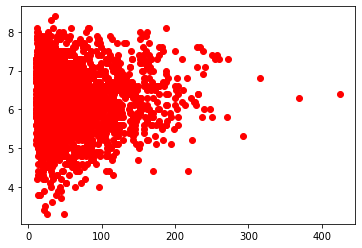

In [120]:
plt.plot(df['Adj. Budget in mn'],df['vote_average'],'ro')